In [29]:
import pandas as pd
import numpy as np
df = pd.read_csv("credit_risk_dataset.csv")


df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [30]:
df.info

<bound method DataFrame.info of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amn

In [31]:
df.shape


(32581, 12)

In [32]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [33]:
df.describe

<bound method NDFrame.describe of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_a

In [34]:
df['loan_status'].value_counts()


loan_status
0    25473
1     7108
Name: count, dtype: int64

In [35]:
df['loan_status'].value_counts(normalize=True)


loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [36]:
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [37]:
df.rename(columns={'loan_status':'default'},inplace=True)

In [38]:
df['default'].value_counts()

default
0    25473
1     7108
Name: count, dtype: int64

In [39]:
#Create Missing Flags
df['emp_length_missing']=df['person_emp_length'].isnull().astype(int)
df['int_rate_missing'] = df['loan_int_rate'].isnull().astype(int)

In [40]:
#Median Impute
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [41]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
default                       0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
emp_length_missing            0
int_rate_missing              0
dtype: int64

In [42]:
#Encode Y/N column
df['cb_person_default_on_file']=df['cb_person_default_on_file'].map({'Y':1,'N':0})

In [43]:
# Apply one-hot encoding first (creates Boolean values)
df = pd.get_dummies(df,
                    columns=['person_home_ownership', 'loan_intent', 'loan_grade'],
                    drop_first=True)

# Convert only dummy (boolean) columns to 0/1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)



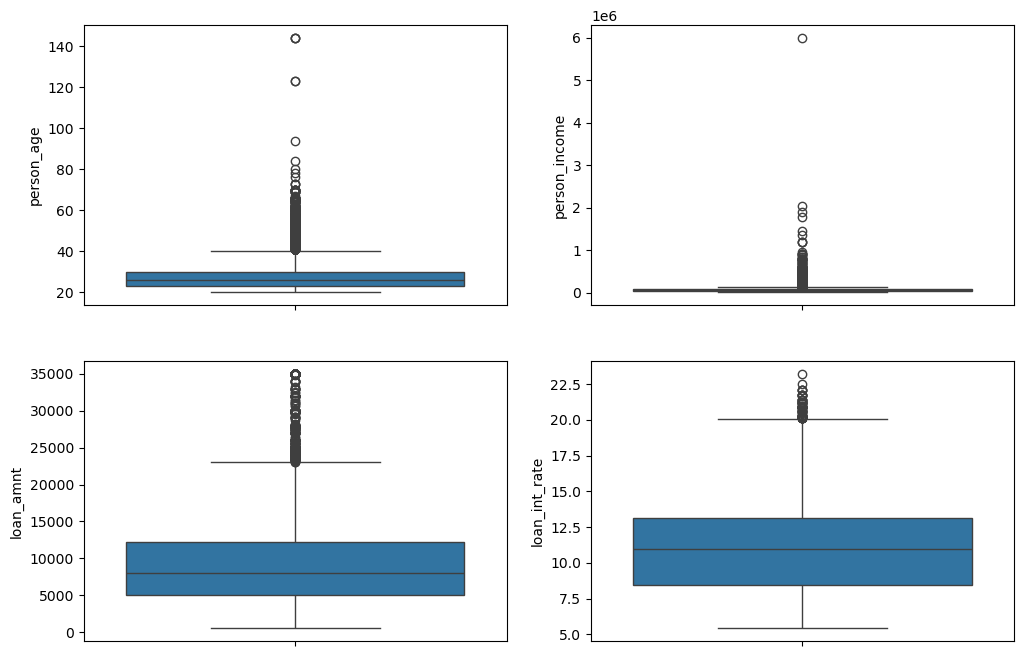

In [44]:
#OUTLIER CHECK & FIXING
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(df['person_age'],ax=ax[0,0])
sns.boxplot(df['person_income'],ax=ax[0,1])
sns.boxplot(df['loan_amnt'],ax=ax[1,0])
sns.boxplot(df['loan_int_rate'],ax=ax[1,1])
plt.show()

In [45]:
#Apply capping:
df['person_age'] = df['person_age'].clip(lower=18, upper=100)
df['person_income'] = df['person_income'].clip(lower=0,upper=df['person_income'].quantile(0.99))

df['loan_amnt'] = df['loan_amnt'].clip(lower=0,upper=df['loan_amnt'].quantile(0.99))
df['loan_int_rate'] = df['loan_int_rate'].clip(lower=0,upper=df['loan_int_rate'].quantile(0.99))

C:\Users\Mohd Haseeb\AppData\Local\Temp\ipykernel_11488\3377572732.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_income'] = df['person_income'].clip(lower=0,upper=df['person_income'].quantile(0.99))


In [46]:
df_clean = df.copy()
df_clean.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,default,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,29800,16.02,1,0.59,1,3,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,1,0,0,0,1,0,0,0,0
3,23,65500,4.0,29800,15.23,1,0.53,0,2,0,...,0,1,0,0,0,1,0,0,0,0
4,24,54400,8.0,29800,14.27,1,0.55,1,4,0,...,0,1,0,0,0,1,0,0,0,0


In [49]:
df_clean.to_csv("clean_credit_risk_dataset3.csv", index=False)

In [50]:
df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,default,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,29800,16.02,1,0.59,1,3,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,1,0,0,0,1,0,0,0,0
3,23,65500,4.0,29800,15.23,1,0.53,0,2,0,...,0,1,0,0,0,1,0,0,0,0
4,24,54400,8.0,29800,14.27,1,0.55,1,4,0,...,0,1,0,0,0,1,0,0,0,0


In [54]:
df.select_dtypes(include=['bool']).columns


Index([], dtype='object')

In [55]:
df.isnull().sum() 


person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
default                        0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
emp_length_missing             0
int_rate_missing               0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
dtype: int64

In [ ]:
df.columns

In [ ]:
df['default'].value_counts()


In [53]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,default,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,29800,16.02,1,0.59,1,3,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,1,0,0,0,1,0,0,0,0
3,23,65500,4.0,29800,15.23,1,0.53,0,2,0,...,0,1,0,0,0,1,0,0,0,0
4,24,54400,8.0,29800,14.27,1,0.55,1,4,0,...,0,1,0,0,0,1,0,0,0,0
